In [277]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 15, 8
#rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_random_seed(RANDOM_SEED)

In [11]:
column_names = ['user_id', 'activity', 'timestamp', 'x_axis', 'y_axis', 'z_axis']

df = pd.read_csv('data//WISDM_ar_v1.1_raw.txt', header=None, names=column_names)
df.z_axis.replace(regex=True, inplace=True, to_replace=r';', value=r'')
df['z_axis'] = df.z_axis.astype(np.float64)
#df.dropna(axis=0, how='any', inplace=True)

In [12]:
df.shape

(1098204, 6)

In [14]:
df[df.isnull().all(axis=1)]

,user_id,activity,timestamp,x_axis,y_axis,z_axis


In [17]:
user_shapes = []
for user in df.user_id.unique():
    user_shapes.append(df[df.user_id == user].shape[0])

In [20]:
user_shapes = []
for user in df.user_id.unique():
    print(df[df.user_id == user].shape[0])

29453
22020
56632
38245
37093
28154
29704
34958
32261
32811
35506
22394
31659
20470
28509
34883
21358
32578
38192
25736
32641
25673
11371
25335
35947
41188
44282
35436
35161
22310
29978
12923
13468
23525
30967
45383


In [19]:
min(user_shapes), max(user_shapes)

(11371, 56632)

In [ ]:
user_shapes = []
for user in df.user_id.unique():
    print(df[df.user_id == user].shape[0])

In [36]:
df[df.user_id == 1]

,user_id,activity,timestamp,x_axis,y_axis,z_axis
941960,1,Walking,4991922345000,0.69,10.80,-2.03
941961,1,Walking,4991972333000,6.85,7.44,-0.50
941962,1,Walking,4992022351000,0.93,5.63,-0.50
941963,1,Walking,4992072339000,-2.11,5.01,-0.69
941964,1,Walking,4992122358000,-4.59,4.29,-1.95
...,...,...,...,...,...,...
971933,1,Downstairs,6895352430000,-0.61,9.72,2.07
971934,1,Downstairs,6895402326000,5.71,11.35,0.69
971935,1,Downstairs,6895452344000,8.62,5.41,-1.18
971936,1,Downstairs,6895502332000,4.25,7.59,0.08


In [27]:
df[df.user_id == 1].sort_values(by='timestamp')['timestamp']

941960    4991922345000
941961    4991972333000
941962    4992022351000
941963    4992072339000
941964    4992122358000
              ...      
971933    6895352430000
971934    6895402326000
971935    6895452344000
971936    6895502332000
971937    6895552320000
Name: timestamp, Length: 29978, dtype: int64

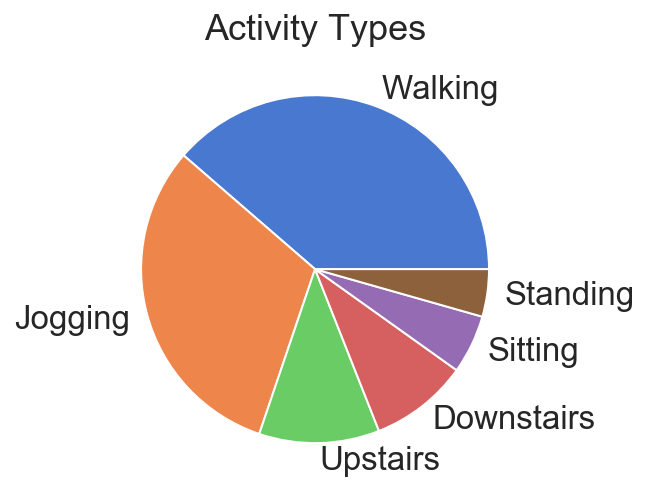

In [51]:
df['activity'].value_counts().plot(kind='pie', title='Activity Types', label ='');

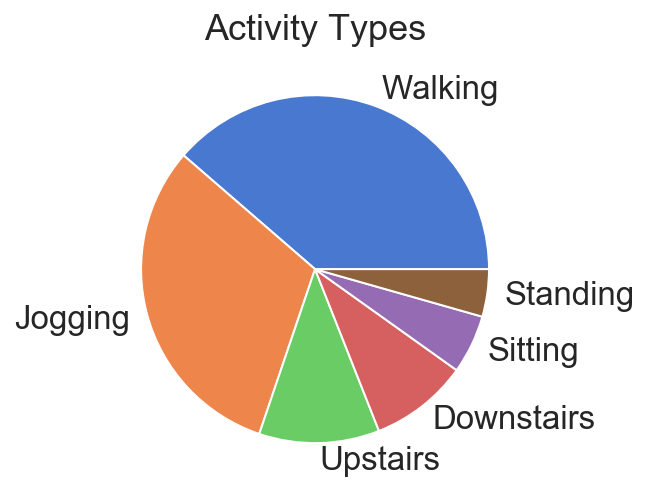

In [52]:
plot_pie = df['activity'].value_counts().plot(kind='pie', title='Activity Types', label ='')

In [53]:
plot_pie.get_figure().savefig("pie.png")

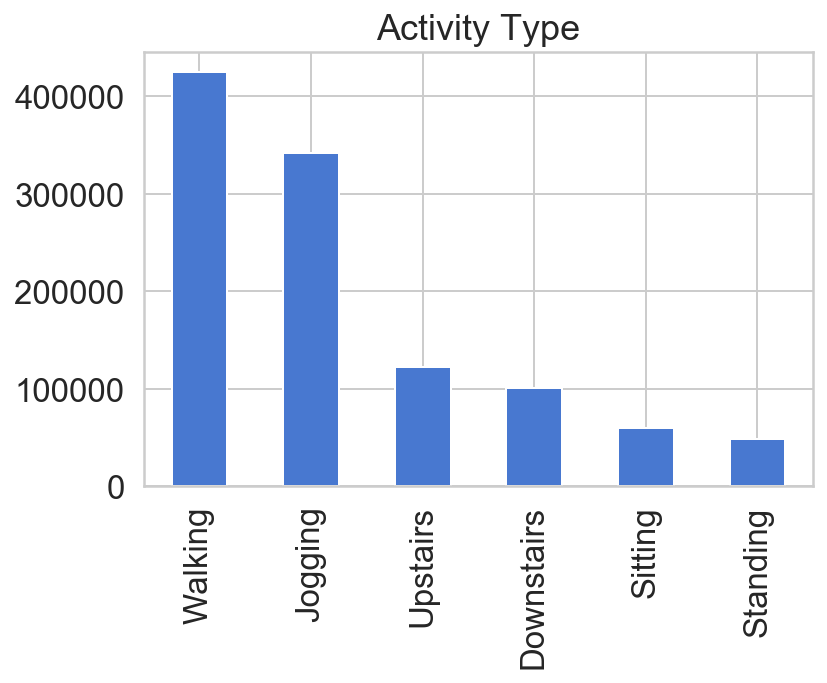

In [45]:
df['activity'].value_counts().plot(kind='bar', title='Activity Type');

Text(0, 0.5, 'activity')

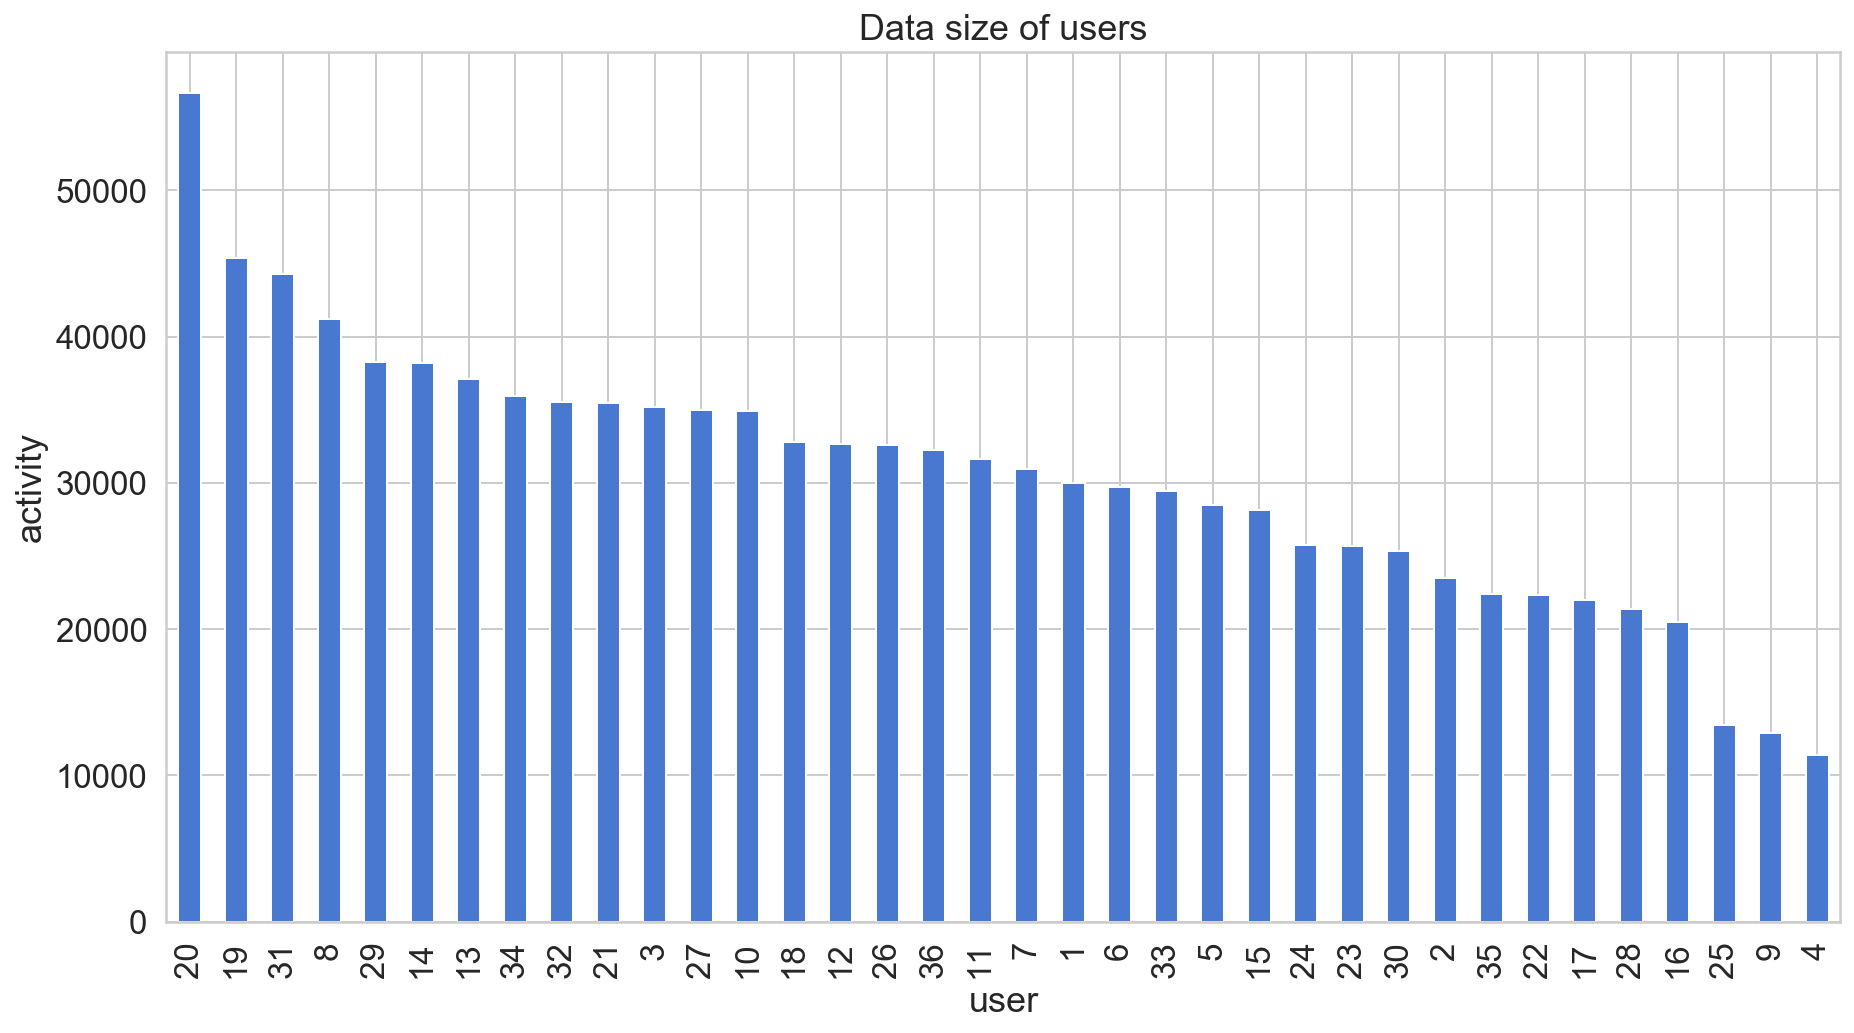

In [278]:
plot_user = df['user_id'].value_counts().plot(kind='bar', title='Data size of users');
plot_user.set_xlabel("user")
plot_user.set_ylabel("activity")

In [279]:
plot_user.get_figure().savefig("user.png")

In [65]:
df.columns

Index(['user_id', 'activity', 'timestamp', 'x_axis', 'y_axis', 'z_axis'], dtype='object')

In [70]:
df.head(2)

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098204 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098204 non-null  int64  
 1   activity   1098204 non-null  object 
 2   timestamp  1098204 non-null  int64  
 3   x_axis     1098204 non-null  float64
 4   y_axis     1098204 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [80]:
def mag(df):
    return math.sqrt(df.x_axis**2 + df.y_axis**2  + df.z_axis**2)

In [82]:
import math 
df['mag'] = df.apply(mag, axis=1)

In [83]:
df.head()

,user_id,activity,timestamp,x_axis,y_axis,z_axis,mag
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,12.709551
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,12.365693
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,11.936562
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,18.751973
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,14.139804


In [219]:
activities = list(df.activity.unique())
activities

['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']

In [135]:
for activity in activities:
    print(" "*19 , activity)
    df_tmp = df[df.activity == activity][['x_axis', 'y_axis', 'z_axis', 'mag']]
    df_ac = round(df_tmp.describe(), 3)[1:]
    df_ac.reset_index(inplace=True)
    df_ac = df_ac.append({'index':'var', 'x_axis':np.var(df_tmp[['x_axis']]).values[0], 'y_axis':np.var(df_tmp[['y_axis']]).values[0], \
                          'z_axis':np.var(df_tmp[['z_axis']]).values[0], 'mag':np.var(df_tmp[['mag']]).values[0]}, ignore_index=True)
    print(df_ac.set_index(['index']))

                    Jogging
          x_axis     y_axis     z_axis        mag
index                                            
mean   -0.202000   5.461000  -0.124000  13.411000
std     9.110000   9.225000   5.833000   7.221000
min   -19.610000 -19.610000 -19.800000   0.000000
25%    -5.430000  -0.720000  -3.490000   7.486000
50%     0.000000   4.560000  -0.300000  13.163000
75%     5.180000  13.380000   3.296000  19.554000
max    19.950000  20.040000  19.610000  33.378000
var    82.982843  85.099751  34.026207  52.144981
                    Walking
         x_axis     y_axis    z_axis        mag
index                                          
mean    1.52800   8.702000  -0.08400  11.429000
std     5.79300   5.006000   4.01100   4.708000
min   -19.61000 -18.850000 -19.38000   0.000000
25%    -2.15000   5.280000  -2.37000   7.996000
50%     0.95000   8.770000  -0.50400  11.027000
75%     4.82000  12.150000   1.69000  14.400000
max    19.91000  20.040000  19.23000  31.709000
var    33.56

In [200]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x_axis', 'y_axis', 'z_axis']][:400]
    print(data)
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

In [202]:
def plot_act(activity, df):
    data = df[df['activity'] == activity][['timestamp','x_axis', 'y_axis', 'z_axis']][:400]
    plt.plot(data['x_axis'])
    plt.plot(data['y_axis'])
    plt.plot(data['z_axis'])
    plt.title(activity)
    plt.legend(['x_axis', 'y_axis', 'z_axis'], loc='center right')
    plt.savefig(activity + '.png')
    plt.clf()

In [203]:
for activity in activities:
    plot_act(activity, df)

<Figure size 1800x720 with 0 Axes>

        x_axis     y_axis    z_axis
1769 -0.040861   4.985047  6.510526
1770 -0.463092   4.372132  7.436710
1771 -0.299648   4.603678  6.510526
1772 -0.272407   4.481094  6.360703
1773 -1.525479   5.175732  7.164303
...        ...        ...       ...
2164 -0.503953  12.789507  0.803601
2165 -2.410802   7.777218  0.926184
2166  0.572055   5.625204  1.879608
2167 -0.653777   6.823794  2.179256
2168 -1.144109  11.141444  4.985047

[400 rows x 3 columns]


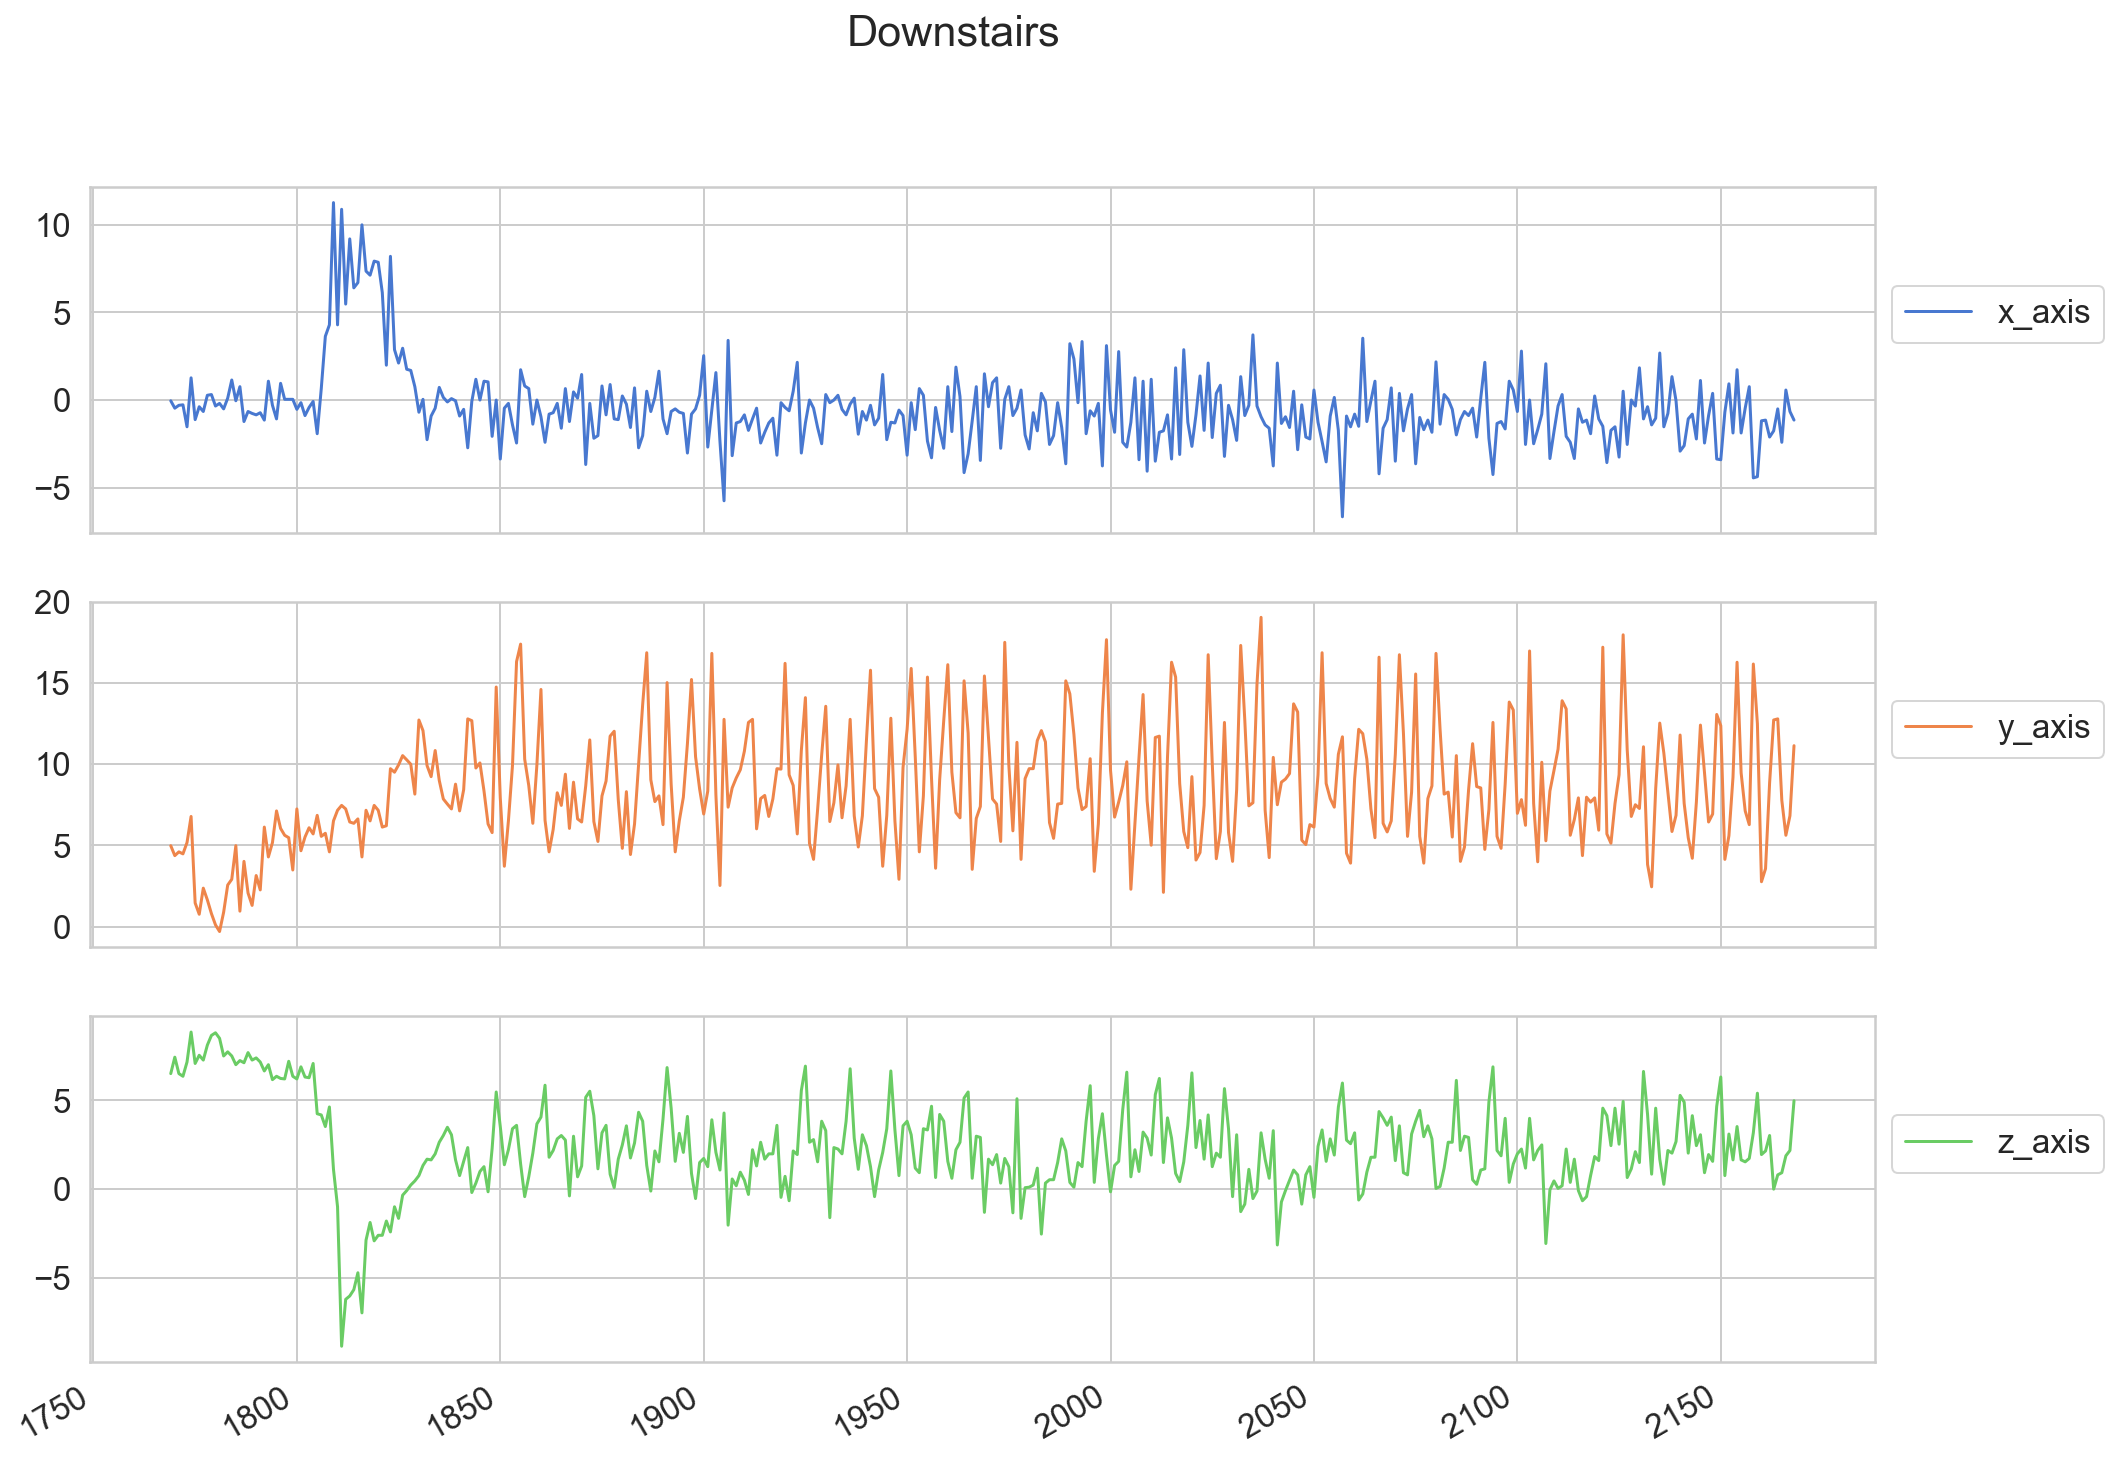

In [201]:
plot_activity("Downstairs", df)

In [204]:
def plot_act_mag(activity, df):
    data = df[df['activity'] == activity][['mag']][:400]
    plt.plot(data['mag'])
    plt.title(activity)
    plt.legend(['magnitude'], loc='upper right')
    plt.savefig(activity + '_mag.png')
    plt.clf()

In [205]:
for activity in activities:
    plot_act_mag(activity, df)

<Figure size 1800x720 with 0 Axes>

In [235]:
acts = activities.copy()
def act_mag(df):
    print(acts)
    act = acts[0]
    data = df[df['activity'] == act][['mag']][:400]
    acts.pop(0)
    return data, act

['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
['Walking', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
['Upstairs', 'Downstairs', 'Sitting', 'Standing']
['Downstairs', 'Sitting', 'Standing']
['Sitting', 'Standing']
['Standing']


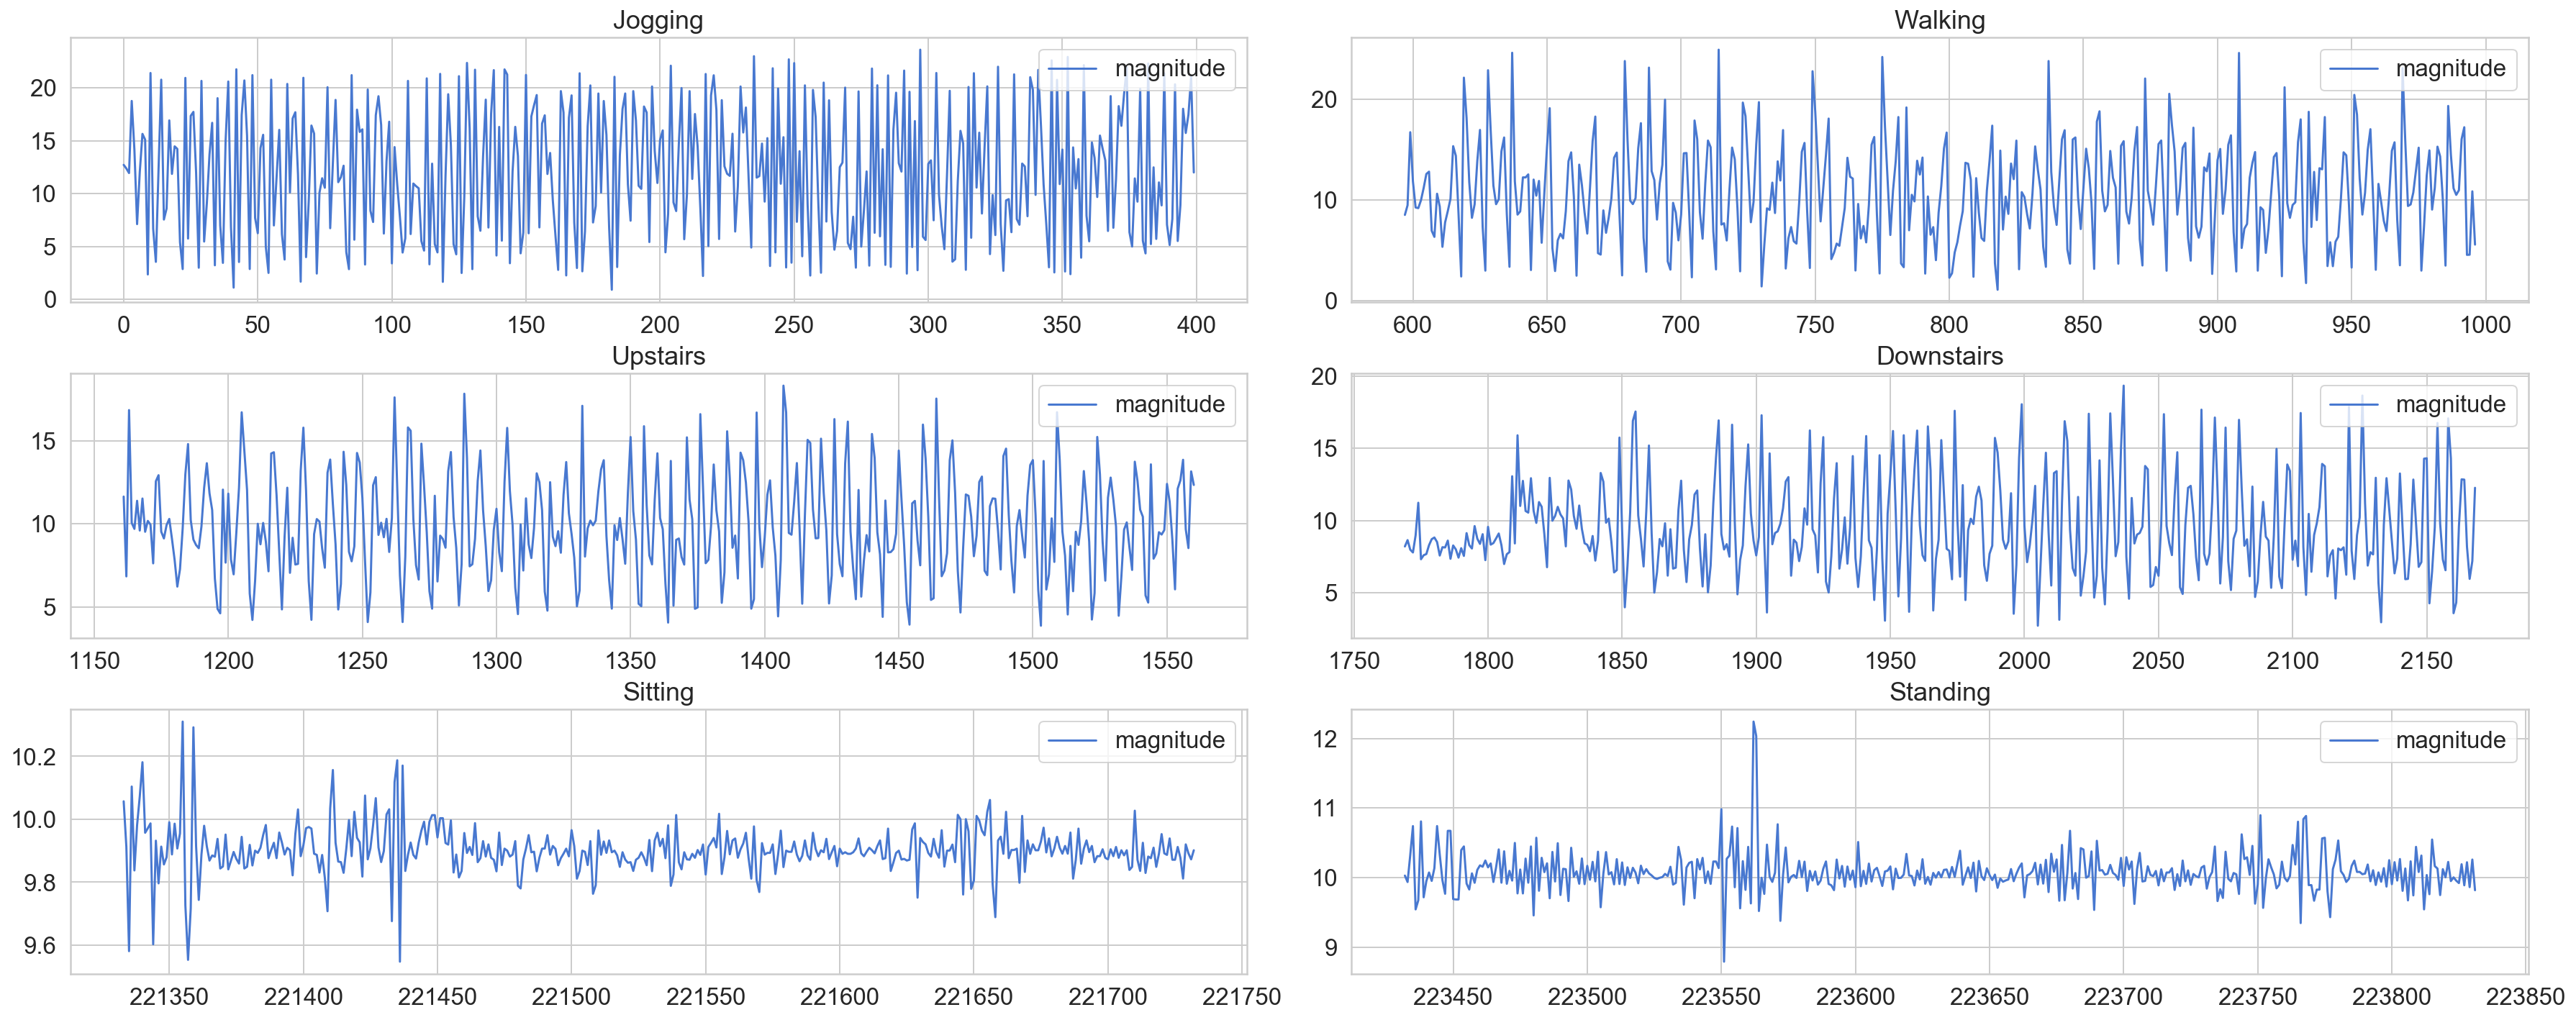

In [236]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=2)
fig.tight_layout()

for row in ax:
    for col in row:
        data, activity = act_mag(df)
        col.plot(data['mag'])
        col.set_title(activity)
        col.legend(['magnitude'], loc='upper right')

#plt.show()
plt.savefig('magnitude.png')